[복습]
과소적합 : 실습데이터의 정확도, 테스트데이터의 정확도에서 테스트데이터의 정확도가 높을 때 과소적합이라고 함.

KNN회귀(k-최근접 이웃 회귀) : 이웃된 데이터를 가지고 예측하기 때문에 학습된 데이터의 범위가 벗어나면 정확도가 떨어짐. ==> 선형회귀로 보완

In [35]:
# from sklearn import svm, metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor # 회귀-예측
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split # train_test_split : train data, test data를 나누는 함수
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글설정
matplotlib.rcParams['font.size'] = 10 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호(-) 표기

In [36]:
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

In [37]:
df.info() # null, 0, 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


In [38]:
df.describe()

,length,height,width
count,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536
std,9.021668,2.878343,1.775006
min,8.400000,2.110000,1.410000
25%,21.825000,5.690000,3.520000
50%,25.300000,6.920000,4.155000
75%,36.625000,10.850000,6.450000
max,44.000000,12.800000,8.140000


In [39]:
# 확인 필요

In [40]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [41]:
df.shape

(56, 3)

In [42]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)
train_input

array([[19.6 ,  5.14,  3.04],
       [22.  ,  5.88,  3.52],
       [18.7 ,  5.2 ,  3.12],
       [17.4 ,  4.59,  2.94],
       [36.  , 10.61,  6.74],
       [25.  ,  6.44,  3.68],
       [40.  , 11.93,  7.11],
       [39.  , 12.43,  7.35],
       [43.  , 11.93,  7.28],
       [22.  ,  5.64,  3.52],
       [20.  ,  5.08,  2.77],
       [22.  ,  6.11,  3.52],
       [24.  ,  7.29,  3.72],
       [27.5 ,  7.17,  4.34],
       [43.  , 12.51,  7.42],
       [40.  , 11.73,  7.22],
       [24.  ,  6.38,  3.82],
       [21.  ,  5.92,  3.31],
       [27.5 ,  7.05,  4.34],
       [40.  , 12.38,  7.46],
       [32.8 , 10.03,  6.02],
       [26.5 ,  7.17,  4.14],
       [36.5 , 10.88,  6.86],
       [13.7 ,  3.53,  2.  ],
       [22.7 ,  5.95,  3.63],
       [15.  ,  3.82,  2.43],
       [37.  , 10.57,  6.37],
       [35.  , 11.49,  7.8 ],
       [28.7 ,  7.59,  4.64],
       [23.5 ,  6.28,  3.72],
       [39.  , 11.14,  6.  ],
       [21.  ,  5.69,  3.56],
       [23.  ,  5.22,  3.63],
       [22

In [43]:
# 데이터 훈련 : **2
lr = LinearRegression()
lr.fit(train_input, train_target)


LinearRegression()

In [44]:
# train 확률
lr.score(train_input, train_target)

0.9559326821885706

In [45]:
# test 확률
lr.score(test_input, test_target)

0.8796419177546367

In [46]:
train_input

array([[19.6 ,  5.14,  3.04],
       [22.  ,  5.88,  3.52],
       [18.7 ,  5.2 ,  3.12],
       [17.4 ,  4.59,  2.94],
       [36.  , 10.61,  6.74],
       [25.  ,  6.44,  3.68],
       [40.  , 11.93,  7.11],
       [39.  , 12.43,  7.35],
       [43.  , 11.93,  7.28],
       [22.  ,  5.64,  3.52],
       [20.  ,  5.08,  2.77],
       [22.  ,  6.11,  3.52],
       [24.  ,  7.29,  3.72],
       [27.5 ,  7.17,  4.34],
       [43.  , 12.51,  7.42],
       [40.  , 11.73,  7.22],
       [24.  ,  6.38,  3.82],
       [21.  ,  5.92,  3.31],
       [27.5 ,  7.05,  4.34],
       [40.  , 12.38,  7.46],
       [32.8 , 10.03,  6.02],
       [26.5 ,  7.17,  4.14],
       [36.5 , 10.88,  6.86],
       [13.7 ,  3.53,  2.  ],
       [22.7 ,  5.95,  3.63],
       [15.  ,  3.82,  2.43],
       [37.  , 10.57,  6.37],
       [35.  , 11.49,  7.8 ],
       [28.7 ,  7.59,  4.64],
       [23.5 ,  6.28,  3.72],
       [39.  , 11.14,  6.  ],
       [21.  ,  5.69,  3.56],
       [23.  ,  5.22,  3.63],
       [22

In [47]:
train_input.shape # (42,3)

(42, 3)

In [62]:
# 특성을 추가해서 모델적용 : Feature 컬럼
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures() # 1을 없애고 싶어(의미 없으므로). x의 0승 ==> include_bias=False 넣어줘
poly = PolynomialFeatures(include_bias=False)
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit([[2,3]])
poly.transform([[2,3]])

array([[  2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.,  16.,  24.,
         36.,  54.,  81.,  32.,  48.,  72., 108., 162., 243.]])

In [48]:
# 특성을 추가해서 모델적용 : Feature 컬럼
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [49]:
train_poly

array([[  19.6   ,    5.14  ,    3.04  ,  384.16  ,  100.744 ,   59.584 ,
          26.4196,   15.6256,    9.2416],
       [  22.    ,    5.88  ,    3.52  ,  484.    ,  129.36  ,   77.44  ,
          34.5744,   20.6976,   12.3904],
       [  18.7   ,    5.2   ,    3.12  ,  349.69  ,   97.24  ,   58.344 ,
          27.04  ,   16.224 ,    9.7344],
       [  17.4   ,    4.59  ,    2.94  ,  302.76  ,   79.866 ,   51.156 ,
          21.0681,   13.4946,    8.6436],
       [  36.    ,   10.61  ,    6.74  , 1296.    ,  381.96  ,  242.64  ,
         112.5721,   71.5114,   45.4276],
       [  25.    ,    6.44  ,    3.68  ,  625.    ,  161.    ,   92.    ,
          41.4736,   23.6992,   13.5424],
       [  40.    ,   11.93  ,    7.11  , 1600.    ,  477.2   ,  284.4   ,
         142.3249,   84.8223,   50.5521],
       [  39.    ,   12.43  ,    7.35  , 1521.    ,  484.77  ,  286.65  ,
         154.5049,   91.3605,   54.0225],
       [  43.    ,   11.93  ,    7.28  , 1849.    ,  512.99  ,  313.04  

In [50]:
train_poly.shape # (42, 9)

(42, 9)

In [53]:
# 데이터 훈련 : **2
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [58]:
df.columns

Index(['length', ' height', ' width'], dtype='object')

In [57]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [56]:
# train 확률
lr.score(train_poly, train_target) # 0.9903183436982126

0.9903183436982126

In [55]:
# test 확률
lr.score(test_poly, test_target) # 0.9714559911594125

0.9714559911594125

In [65]:
# 특성을 추가해서 모델적용 : Feature 컬럼
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [66]:
train_poly.shape

(42, 19)

In [68]:
# 데이터 훈련 : **2
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [69]:
lr.score(train_poly, train_target) # 0.9963872340980141


0.9963872340980141

In [70]:
lr.score(test_poly, test_target) # 0.9410534492198891


0.9410534492198891

In [73]:
# 특성을 추가해서 모델적용 : Feature 컬럼
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

train_poly.shape # (42,55)

(42, 55)

In [74]:
# 데이터 훈련 : **2
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [75]:
lr.score(train_poly, train_target) # 0.9999999999997232

0.9999999999997232

In [76]:
lr.score(test_poly, test_target) # -144.40564483377855 # 예측률이 음수값이 나옴

-144.40564483377855

적절할 규제 강도 찾기

규제: 선형회귀에서 특성의 값을 많이 늘어났을 때, 특성의 값을 규제하여 test 세트에서도 제대로 예측할 수 있도록 함.
- 릿지규제(회귀) 
- 라쏘규제(회귀) 

In [ ]:
# 릿지회쉬, 라쏘회귀 적용을 시키려면 규제를 적용하려면 꼭 표준화 작업을 해줘야 함. 
# 표준화 = (데이터-평균)/표준편차

In [77]:
from sklearn.preprocessing import StandardScaler # 표준화작업 클래스

# 표준화 작업
ss=StandardScaler()
ss.fit(train_poly) # 표준화 적용

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [80]:
# 릿지규제(회귀)
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target) # 기울기 억제/규제

Ridge()

In [81]:
ridge.score(train_scaled, train_target) # 0.9896101671037343 ==> 0.99에서 0.98 소폭 하향

0.9896101671037343

In [82]:
ridge.score(test_scaled, test_target) # 0.9790693977615387 ==> -144에서 99로 증가

0.9790693977615387

In [83]:
# 선형회귀
# 특성값 추가
# 규제
# 과대 적합율 해소

In [86]:
# 릿지회귀에서도 강도를 어느정도로 할지에 따라 예측값이 높아지는 형테가 나옴.
# Ridge(alpha=1) => 늘려봄
# for문을 사용해서 alpha 값을 조정

# 그래프 적용을 위해 배열
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 0.001 ~ 100 예측률 확인

for alpha in alpha_list :
    # print(alpha)
    # 규제를 적용한 훈련
    ridge = Ridge(alpha=alpha) # 0.001, 0.01, 0.1, 1, 10, 100
    ridge.fit(train_scaled, train_target) # 훈련
    train1 = ridge.score(train_scaled, train_target)
    test1 = ridge.score(test_scaled, test_target)
    train_score.append(train1) # 리스트에 추가
    test_score.append(test1) # 리스트에 추가
    

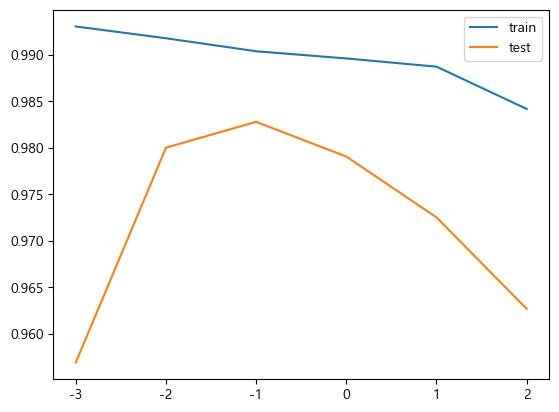

In [93]:
# x축 눈금 적용
# g1 = [1,2,3,4,5,6] 
g2 = np.log10(alpha_list) # x축을 alpha_list로 해야하는데 0.001, 0.1, 1의 간격이 너무 좁아 log 취함
# g2 = np.arange(1,7).reshape(-1,1) # 2차원 배열로 해줘야 1~7로 표현됨
plt.plot(g2, train_score, label = 'train') 
plt.plot(g2, test_score, label = 'test')
plt.legend(loc=0)
# x축이 -1일 때 두 plot이 가장 가까워. -1 ==> 10-1로 0.1

In [91]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target)) # 0.9903815817570367 ==> 0.9896101671037343에서 0.99로 소폭 상승
print(ridge.score(test_scaled, test_target)) # 0.9827976465386928 ==> 0.9790693977615387에서  0.98로 소폭 상승


0.9903815817570367
0.9827976465386928
